In [197]:
# import all necessary packages
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import xarray as xr; from netCDF4 import Dataset
import datetime

In [295]:
# load ERA5 data
file_new = 'summers.nc'
DS_variables =xr.open_dataset(file_new)

u10 = DS_variables['u10'] # u-component of velocity at 10 m height
v10 = DS_variables['v10'] # v-component of velocity at 10 m height
# t2m = DS_variables['t2m'] # u-component of velocity at 10 m height
tp = DS_variables['tp'] # total precipitation
sst = DS_variables['sst'] # sea surface temperature

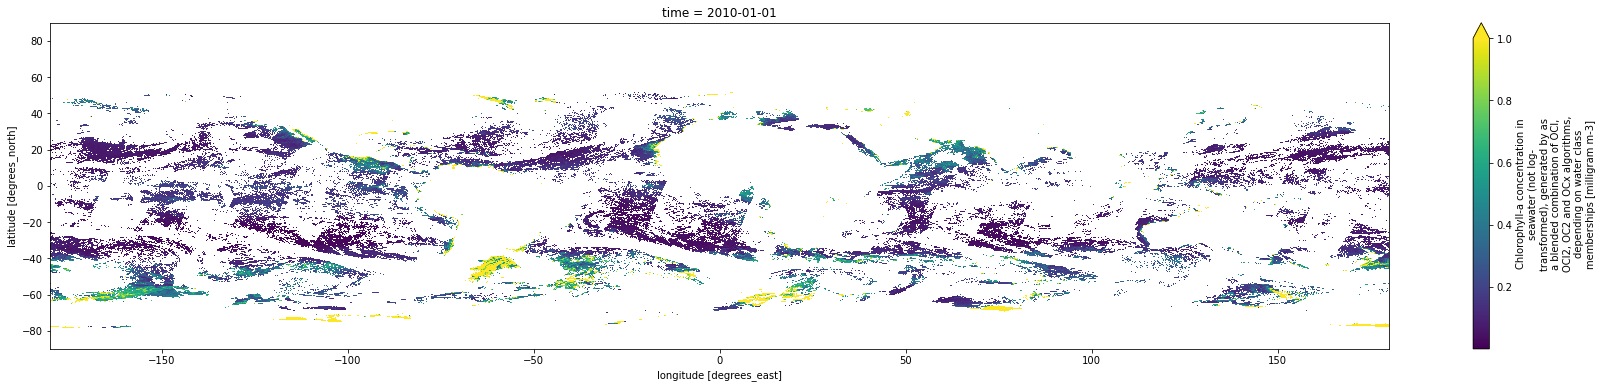

In [200]:
# load sample chlorophyll-a data. Note that this is for one day.
file_new = 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100101-fv5.0.1.nc'
DS_chloro =xr.open_dataset(file_new)
chlor_a = DS_chloro['chlor_a']
chlor_a[0,:,:].plot(vmax=1)

In [279]:
# load MJO indices
MJO_phase = pd.read_csv('mjo_phase_data.csv',index_col=False)
MJO_phase.drop(MJO_phase.columns[[ 5, 6, 7, 8,9,10,11,12]], axis=1, inplace=True)
# pre-processing MJO indices
MJO_phase_renamed = MJO_phase.rename(columns={0: "year", 1: "month", 2: "day", 3:"amplitude"})
MJO_phase_timeframe = MJO_phase_renamed[(MJO_phase_renamed['year'] >= 2010) & (MJO_phase_renamed['year'] <= 2020)].reset_index() 
# we will look only at summer months
just_summer_times = MJO_phase_timeframe[(MJO_phase_timeframe['month'] >= 6) & (MJO_phase_timeframe['month'] <= 8)].reset_index() 
just_summer_times

,level_0,index,year,month,day,phase,amplitude
0,151,13149,2010,6,1,1,1.435723
1,152,13150,2010,6,2,1,1.051954
2,153,13151,2010,6,3,1,0.898930
3,154,13152,2010,6,4,1,0.907644
4,155,13153,2010,6,5,2,0.880114
...,...,...,...,...,...,...,...
1007,3891,16889,2020,8,27,1,2.380026
1008,3892,16890,2020,8,28,2,1.912718
1009,3893,16891,2020,8,29,2,1.670691
1010,3894,16892,2020,8,30,2,1.570872


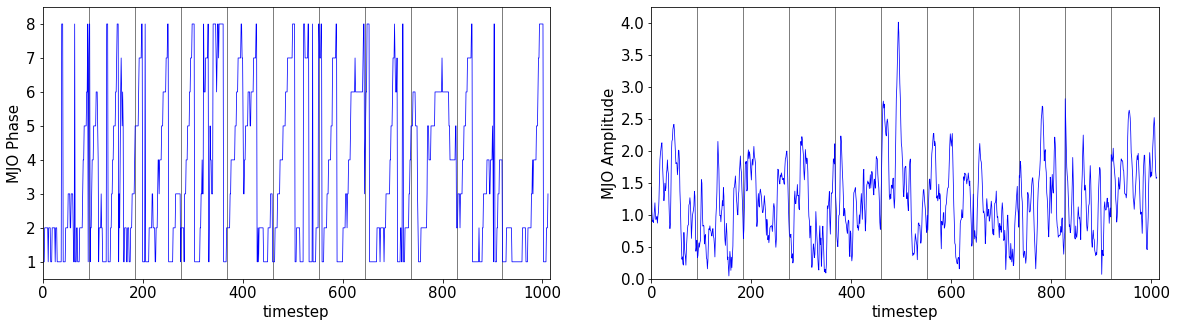

In [293]:
plt.rcParams["figure.figsize"] = (20,5)

plt.subplot(1, 2, 1)
# there has to be an easier way to make these lines
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(just_summer_times)), data1, color='blue',linewidth=0.75)
plt.xlim(0,1015); plt.ylim(0.5,8.5)
plt.xlabel('timestep',fontsize=15); plt.ylabel('MJO Phase', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)

plt.subplot(1, 2, 2)
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(just_summer_times)), data2, color='blue',linewidth=0.75)
plt.xlim(0,1015); plt.ylim(0,4.25)
plt.xlabel('timestep',fontsize=15); plt.ylabel('MJO Amplitude', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.show()

In [294]:
MJO_timeframe['datetime'] = MJO_timeframe[MJO_timeframe.columns[1:4]].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
MJO_timeframe['datetime'] = pd.to_datetime(MJO_timeframe['datetime'], format='%Y-%m-%d')    

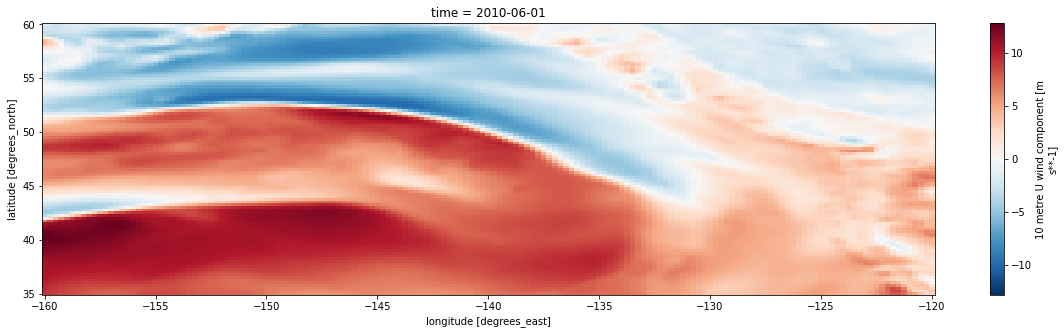

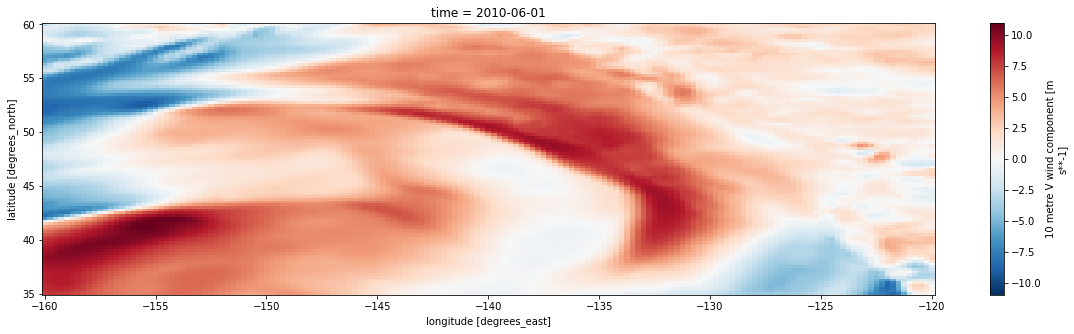

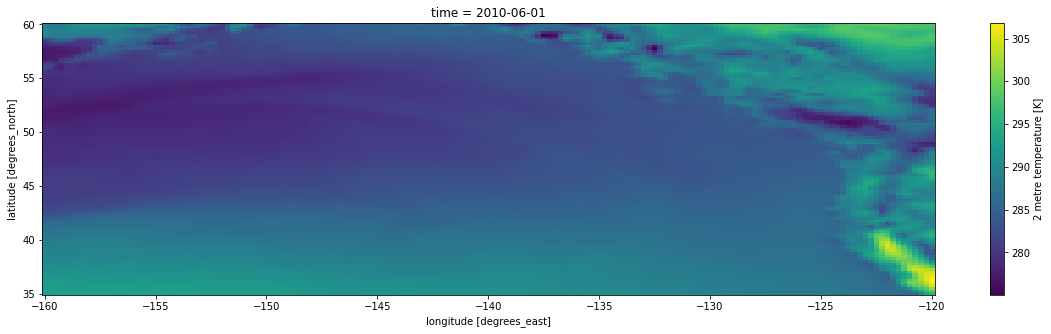

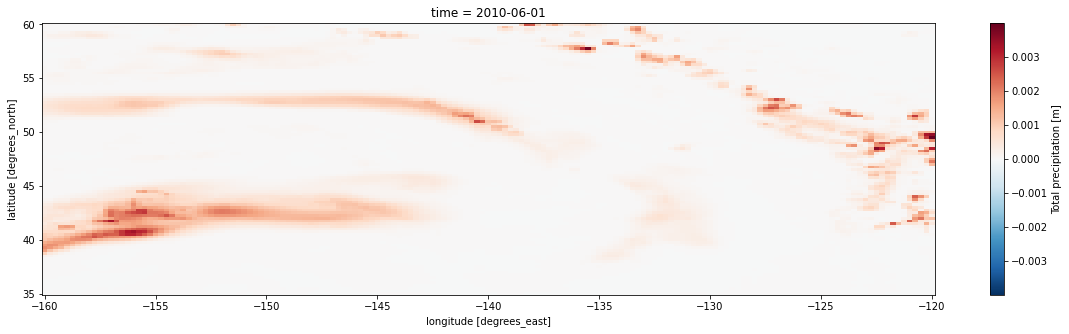

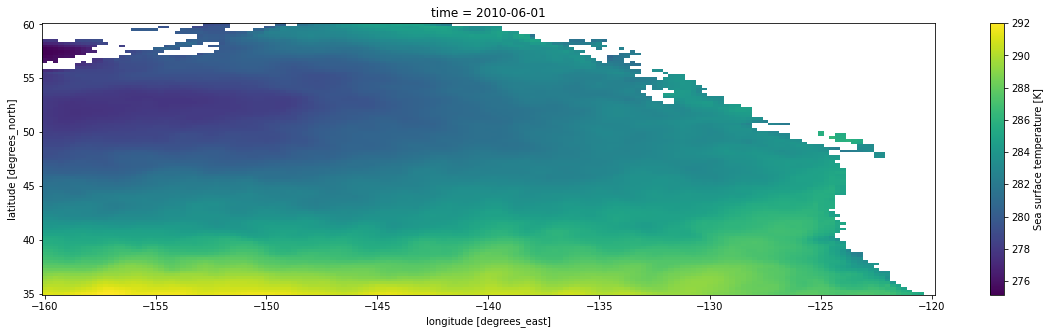

In [297]:
u10[0,:,:].plot()
plt.show()
v10[0,:,:].plot()
plt.show()
t2m[0,:,:].plot()
plt.show()
tp[0,:,:].plot()
plt.show()
sst[0,:,:].plot()
plt.show()

In [298]:
means_tp = []; means_u10 = []; means_v10 = []; means_t2m = []; means_sst = []
max_tp = []; max_u10 = []; max_v10 = []; max_t2m = []; max_sst = []
min_tp = []; min_u10 = []; min_v10 = []; min_t2m = []; min_sst = []

for time in range(len(u10)):
    means_tp.append(np.nanmean(tp[time,:,:]))
    means_u10.append(np.nanmean(u10[time,:,:]))
    means_v10.append(np.nanmean(v10[time,:,:]))
    means_t2m.append(np.nanmean(t2m[time,:,:]))
    means_sst.append(np.nanmean(sst[time,:,:]))
    
    max_tp.append(np.nanmax(tp[time,:,:]))
    max_u10.append(np.nanmax(u10[time,:,:]))
    max_v10.append(np.nanmax(v10[time,:,:]))
    max_t2m.append(np.nanmax(t2m[time,:,:]))
    max_sst.append(np.nanmax(sst[time,:,:]))
    
    min_tp.append(np.nanmin(tp[time,:,:]))
    min_u10.append(np.nanmin(u10[time,:,:]))
    min_v10.append(np.nanmin(v10[time,:,:]))
    min_t2m.append(np.nanmin(t2m[time,:,:]))
    min_sst.append(np.nanmin(sst[time,:,:]))

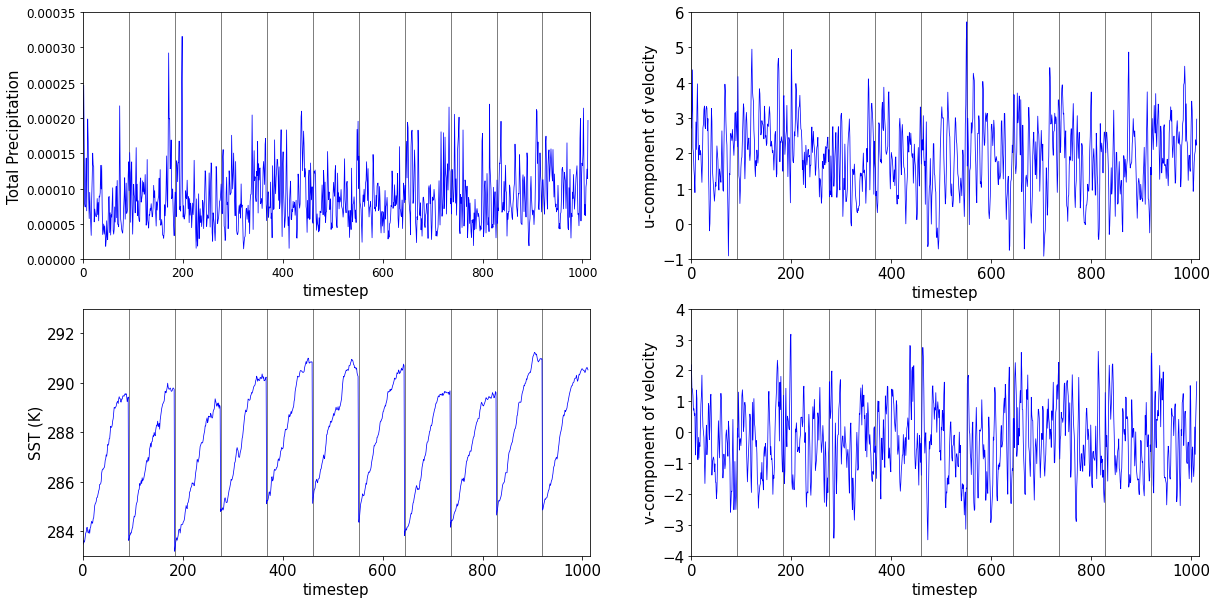

In [318]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 2, 1)
# there has to be an easier way to make these lines
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(means_tp)),means_tp, color='blue',linewidth=0.75)
plt.xlim(0,1015); plt.ylim(0,0.00035)
plt.xlabel('timestep',fontsize=15); plt.ylabel('Total Precipitation', fontsize=15)
plt.yticks(fontsize=12, rotation=0); plt.xticks(fontsize=12, rotation=0)

plt.subplot(2, 2, 2)
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(means_u10)), means_u10, color='blue',linewidth=0.75)
plt.xlim(0,1015); plt.ylim(-1,6)
plt.xlabel('timestep',fontsize=15); plt.ylabel('u-component of velocity', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.xlim(0,1015); plt.ylim(-1,6)

plt.subplot(2, 2, 3)
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(means_sst)), means_sst, color='blue',linewidth=0.75)
plt.xlim(0,1015); plt.ylim(283,293)
plt.xlabel('timestep',fontsize=15); plt.ylabel('SST (K)', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)

plt.subplot(2, 2, 4)
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(means_v10)), means_v10, color='blue',linewidth=0.75)
plt.xlim(0,1015); plt.ylim(-4,4)
plt.xlabel('timestep',fontsize=15); plt.ylabel('v-component of velocity', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)

plt.show()

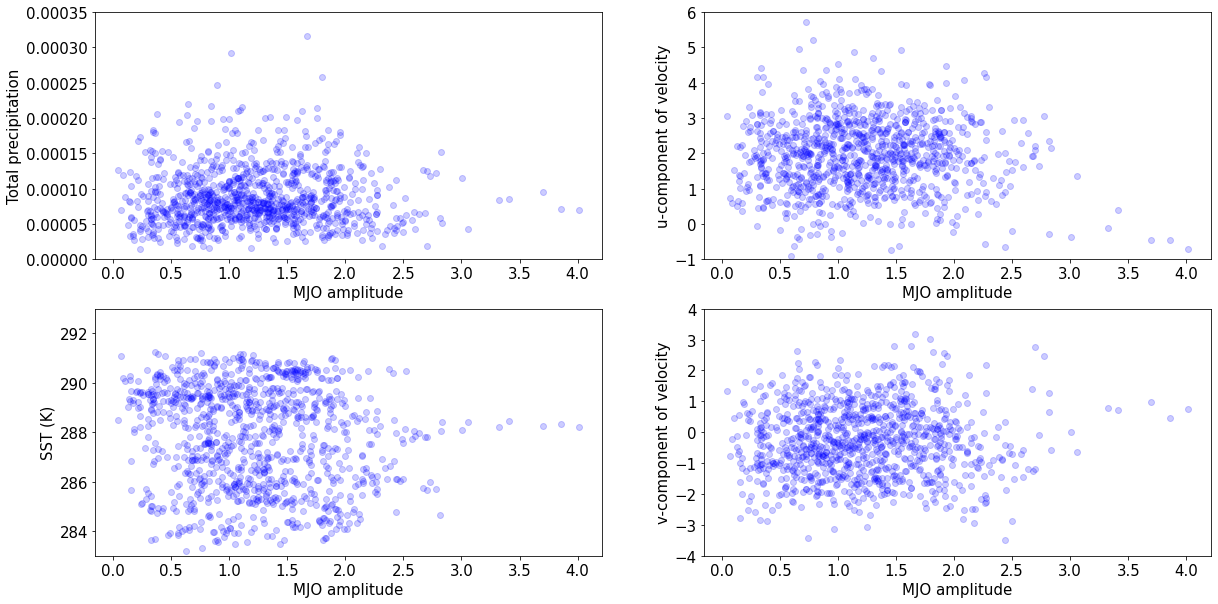

In [334]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 2, 1)
plt.scatter(just_summer_times['amplitude'], means_tp, alpha=0.2, c='blue')
plt.xlabel('MJO amplitude',fontsize=15); plt.ylabel('Total precipitation',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.ylim(0,0.00035)

plt.subplot(2, 2, 2)
plt.scatter(just_summer_times['amplitude'], means_u10, alpha=0.2, c='blue')
plt.xlabel('MJO amplitude',fontsize=15); plt.ylabel('u-component of velocity',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.ylim(-1,6)

plt.subplot(2, 2, 4)
plt.scatter(just_summer_times['amplitude'], means_v10, alpha=0.2, c='blue')
plt.xlabel('MJO amplitude',fontsize=15); plt.ylabel('v-component of velocity',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.ylim(-4,4)

plt.subplot(2, 2, 3)
plt.scatter(just_summer_times['amplitude'], means_sst, alpha=0.2, c='blue')
plt.xlabel('MJO amplitude',fontsize=15); plt.ylabel('SST (K)',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.ylim(283,293)

plt.show()

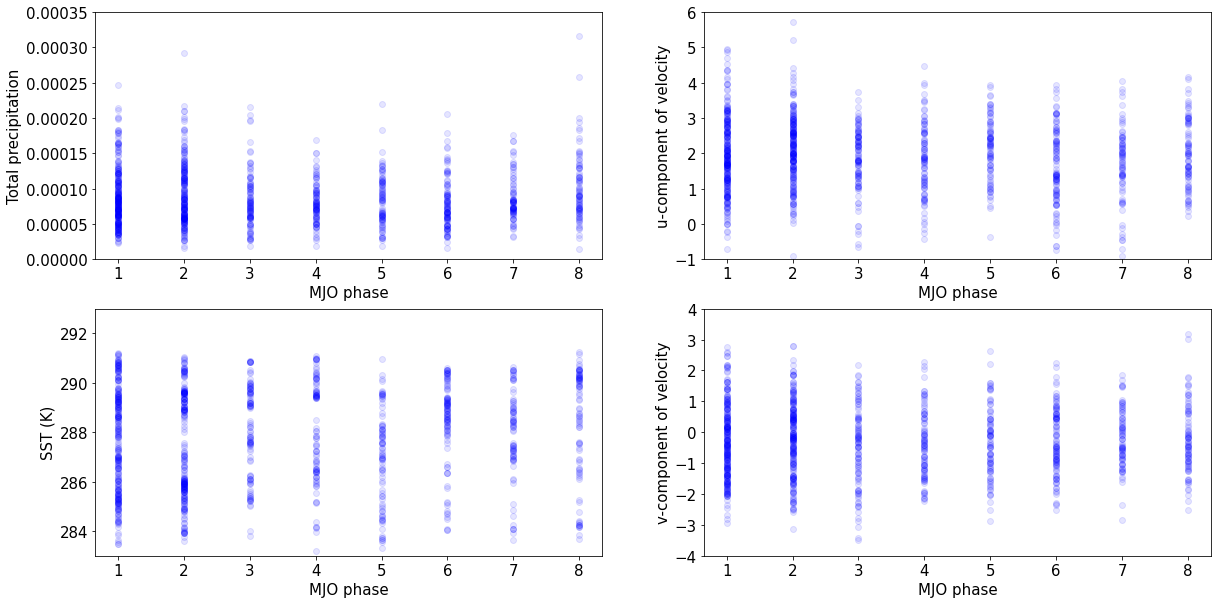

In [337]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 2, 1)
plt.scatter(just_summer_times['phase'], means_tp, alpha=0.1, c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('Total precipitation',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.ylim(0,0.00035)

plt.subplot(2, 2, 2)
plt.scatter(just_summer_times['phase'], means_u10, alpha=0.1, c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('u-component of velocity',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.ylim(-1,6)

plt.subplot(2, 2, 4)
plt.scatter(just_summer_times['phase'], means_v10, alpha=0.1, c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('v-component of velocity',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.ylim(-4,4)

plt.subplot(2, 2, 3)
plt.scatter(just_summer_times['phase'], means_sst, alpha=0.1, c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('SST (K)',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.ylim(283,293)

plt.show()

In [344]:
phasegrouping = pd.DataFrame({'phase' : just_summer_times['phase'],
                                'mean_tp' : means_tp, 'mean_u10' : means_u10, 'mean_v10' : means_v10, 'mean_sst' : means_sst, 'amplitude': just_summer_times['amplitude']}, 
                                columns=['phase','mean_tp','mean_u10','mean_v10','mean_sst','amplitude'])
phasegrouping.groupby("phase").mean()

,mean_tp,mean_u10,mean_v10,mean_sst,amplitude
phase,,,,,
1,0.000089,1.959759,-0.280678,287.685211,1.409413
2,0.000094,2.118860,-0.184903,287.376251,1.285623
3,0.000083,1.864603,-0.450410,288.085510,1.088799
4,0.000080,1.833106,-0.378273,288.082092,1.064848
5,0.000084,2.130553,-0.316704,286.988983,1.155858
6,0.000079,1.659257,-0.295909,288.451874,1.107235
7,0.000087,1.690989,-0.174371,287.937195,1.211395
8,0.000102,1.998047,-0.205592,288.330139,1.024010


In [345]:
phasegrouping.groupby("phase").std()

,mean_tp,mean_u10,mean_v10,mean_sst,amplitude
phase,,,,,
1,0.000041,1.069366,1.181999,2.096351,0.569876
2,0.000044,0.977685,1.185391,2.129835,0.530230
3,0.000039,0.879315,1.295584,1.854150,0.555528
4,0.000029,1.023880,1.083597,2.063545,0.479401
5,0.000036,0.869188,1.134286,1.948684,0.586092
6,0.000036,1.063214,1.054748,1.711795,0.483971
7,0.000032,1.048873,0.932941,1.790180,0.914795
8,0.000049,0.950361,1.111038,2.241261,0.583213
